In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('/content/diabetes_clean_data.csv')

In [5]:
data

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
763,763,10,101,76,48,180,32.9,0.171,63,0
764,764,2,122,70,27,0,36.8,0.340,27,0
765,765,5,121,72,23,112,26.2,0.245,30,0
766,766,1,126,60,0,0,30.1,0.349,47,1


a) set a seed (to ensure work reproducibility) and take a random sample of 25 observations and
find the mean Glucose and highest Glucose values of this sample and compare these statistics
with the population statistics of the same variable. You should use charts for this comparison.

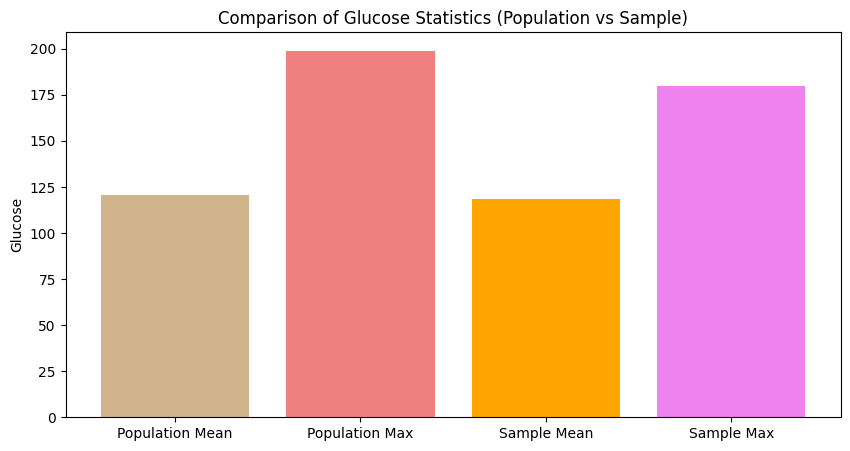

In [6]:
sample_data = data.sample(n=25)

glucose_mean = data['Glucose'].mean()
glucose_max = data['Glucose'].max()
sample_mean_glucose = sample_data['Glucose'].mean()
sample_max_glucose = sample_data['Glucose'].max()

plt.figure(figsize=(10, 5))
plt.bar(['Population Mean', 'Population Max', 'Sample Mean', 'Sample Max'],
        [glucose_mean, glucose_max, sample_mean_glucose, sample_max_glucose],color=['tan','lightcoral','orange','violet'])
plt.title('Comparison of Glucose Statistics (Population vs Sample)')
plt.ylabel('Glucose')
plt.show()

b) Find the 98th percentile of BMI of your sample and the population and compare the results
using charts.

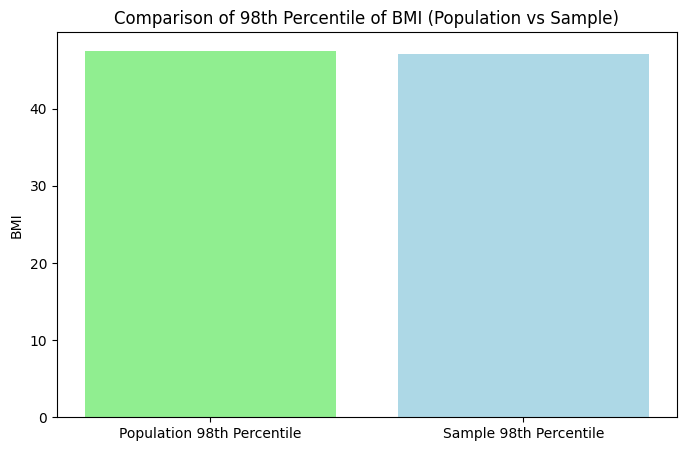

In [7]:
population_98thbmi = np.percentile(data['BMI'], 98)
sample_98thbmi = np.percentile(sample_data['BMI'], 98)

plt.figure(figsize=(8, 5))
plt.bar(['Population 98th Percentile', 'Sample 98th Percentile'],
        [population_98thbmi, sample_98thbmi],color=['lightgreen','lightblue'])
plt.title('Comparison of 98th Percentile of BMI (Population vs Sample)')
plt.ylabel('BMI')
plt.show()

c) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the
population and find the average mean, standard deviation and percentile for BloodPressure and
compare this with these statistics from the population for the same variable. Again, you should
create charts for this comparison. Report on your findings

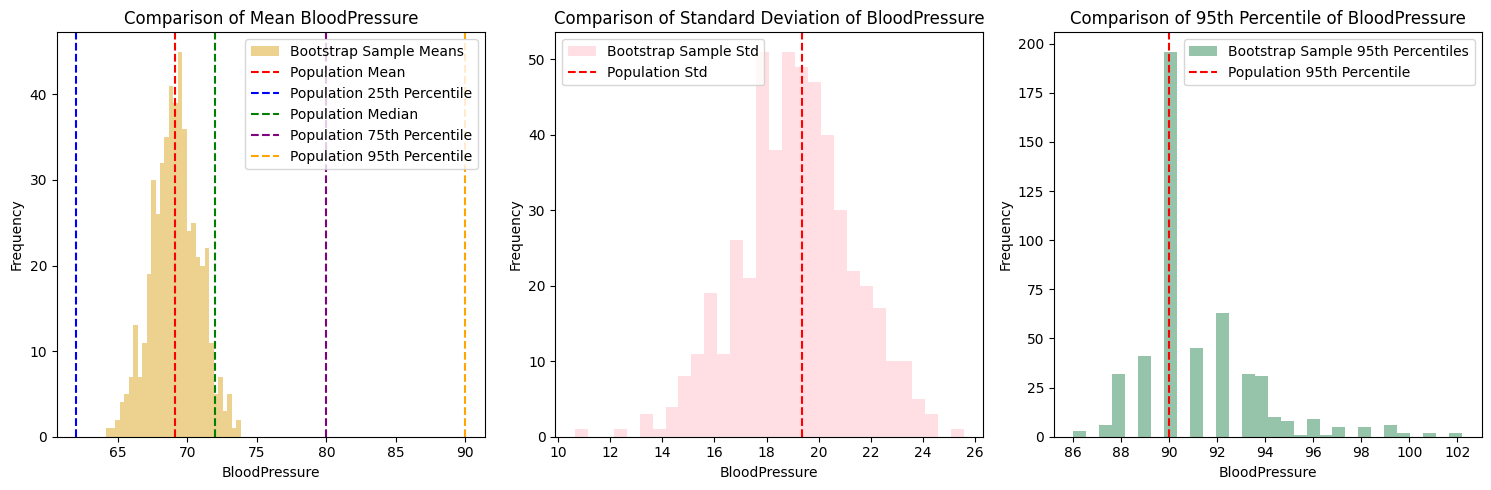

In [8]:
population_mean = data['BloodPressure'].mean()
population_std = data['BloodPressure'].std()
population_percentile_25 = np.percentile(data['BloodPressure'], 25)
population_median = np.percentile(data['BloodPressure'], 50)
population_percentile_75 = np.percentile(data['BloodPressure'], 75)
population_percentile_95 = np.percentile(data['BloodPressure'], 95)

n_bootstrap = 500
bootstrap_size = 150

bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []

for _ in range(n_bootstrap):
    bootstrap_sample = np.random.choice(data['BloodPressure'], size=bootstrap_size, replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))
    bootstrap_stds.append(np.std(bootstrap_sample))
    bootstrap_percentiles.append(np.percentile(bootstrap_sample, 95))

plt.figure(figsize=(20, 5))

# Mean comparison
plt.subplot(1, 4, 1)
plt.hist(bootstrap_means, bins=30, alpha=0.5, color='goldenrod', label='Bootstrap Sample Means')
plt.axvline(x=population_mean, color='red', linestyle='--', label='Population Mean')
plt.axvline(x=population_percentile_25, color='blue', linestyle='--', label='Population 25th Percentile')
plt.axvline(x=population_median, color='green', linestyle='--', label='Population Median')
plt.axvline(x=population_percentile_75, color='purple', linestyle='--', label='Population 75th Percentile')
plt.axvline(x=population_percentile_95, color='orange', linestyle='--', label='Population 95th Percentile')
plt.title('Comparison of Mean BloodPressure')
plt.xlabel('BloodPressure')
plt.ylabel('Frequency')
plt.legend()

# Standard deviation comparison
plt.subplot(1, 4, 2)
plt.hist(bootstrap_stds, bins=30, alpha=0.5, color='pink', label='Bootstrap Sample Std')
plt.axvline(x=population_std, color='red', linestyle='--', label='Population Std')
plt.title('Comparison of Standard Deviation of BloodPressure')
plt.xlabel('BloodPressure')
plt.ylabel('Frequency')
plt.legend()

# Percentile comparison
plt.subplot(1, 4, 3)
plt.hist(bootstrap_percentiles, bins=30, alpha=0.5, color='seagreen', label='Bootstrap Sample 95th Percentiles')
plt.axvline(x=population_percentile_95, color='red', linestyle='--', label='Population 95th Percentile')
plt.title('Comparison of 95th Percentile of BloodPressure')
plt.xlabel('BloodPressure')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()
